### This jupyter notebook is to test the yahoo finance

In [1]:
import yfinance as yf

# Seasonality quarterly
# Draw bollinger bend
# Take Quarter data
# Try to find more granular data from Kaggle for a particular company

In [2]:
import torch

In [3]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [4]:
amazon = yf.Ticker("AMZN")

## aapl.history: get historical market data

In [5]:
# Valid options for "period": 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo, 1y, 2y, 
# 5y, 10y and ytd.

In [6]:
amzn_df = amazon.history(period = "5y").reset_index()

In [7]:
amzn_df.Date.dtype

datetime64[ns, America/New_York]

In [8]:
# aapl.history(period="1y")
amzn_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-10-23 00:00:00-04:00,88.065002,88.502502,87.099998,88.108498,42764000,0.0,0.0
1,2019-10-24 00:00:00-04:00,88.554497,89.417000,88.013496,89.039001,88922000,0.0,0.0
2,2019-10-25 00:00:00-04:00,84.877502,88.210503,84.750000,88.066498,192528000,0.0,0.0
3,2019-10-28 00:00:00-04:00,87.403000,88.934998,87.125000,88.853996,74178000,0.0,0.0
4,2019-10-29 00:00:00-04:00,88.740501,88.849998,87.790497,88.135498,45538000,0.0,0.0
...,...,...,...,...,...,...,...,...
1253,2024-10-16 00:00:00-04:00,187.050003,187.779999,185.610001,186.889999,23456800,0.0,0.0
1254,2024-10-17 00:00:00-04:00,188.220001,188.940002,186.000000,187.529999,25039400,0.0,0.0
1255,2024-10-18 00:00:00-04:00,187.149994,190.740005,186.279999,188.990005,37417700,0.0,0.0
1256,2024-10-21 00:00:00-04:00,188.050003,189.460007,186.399994,189.070007,24612200,0.0,0.0


In [9]:
amzn_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.000000
mean,142.098947,143.830793,140.252677,142.068264,6.930392e+07,0.0,0.015898
std,31.182181,31.273806,30.948189,31.088951,3.383449e+07,0.0,0.563884
min,82.075500,83.480003,81.301498,81.820000,1.762600e+07,0.0,0.000000
25%,115.412498,117.392498,113.712502,115.413002,4.760188e+07,0.0,0.000000
50%,150.650002,152.996750,148.290001,150.343246,6.078300e+07,0.0,0.000000
75%,167.456619,168.765003,165.237877,167.131374,8.216422e+07,0.0,0.000000
max,200.089996,201.199997,199.050003,200.000000,3.113460e+08,0.0,20.000000


In [10]:
amzn_df.loc[amzn_df["Stock Splits"]==20]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
659,2022-06-06 00:00:00-04:00,125.25,128.990005,123.809998,124.790001,135269000,0.0,20.0


In [11]:
amzn_df.loc[amzn_df["Date"]=="2022-06-03 00:00:00-04:00"]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
658,2022-06-03 00:00:00-04:00,124.199997,124.400002,121.046501,122.349998,97604000,0.0,0.0


In [12]:
amzn_df.drop(columns="Dividends", inplace=True)

In [13]:
amzn_df["Stock Splits"].value_counts()

Stock Splits
0.0     1257
20.0       1
Name: count, dtype: int64

### Visualization

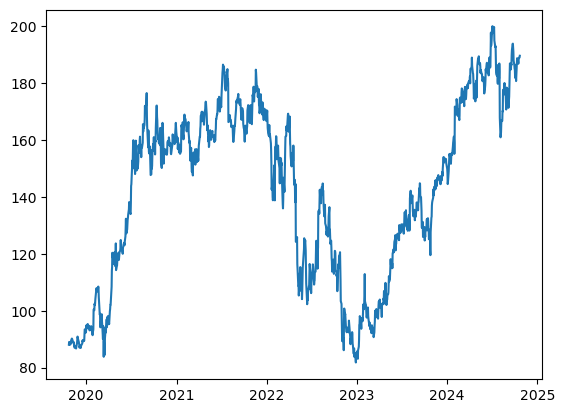

In [14]:
plt.plot(amzn_df.Date, amzn_df.Close)
plt.show()

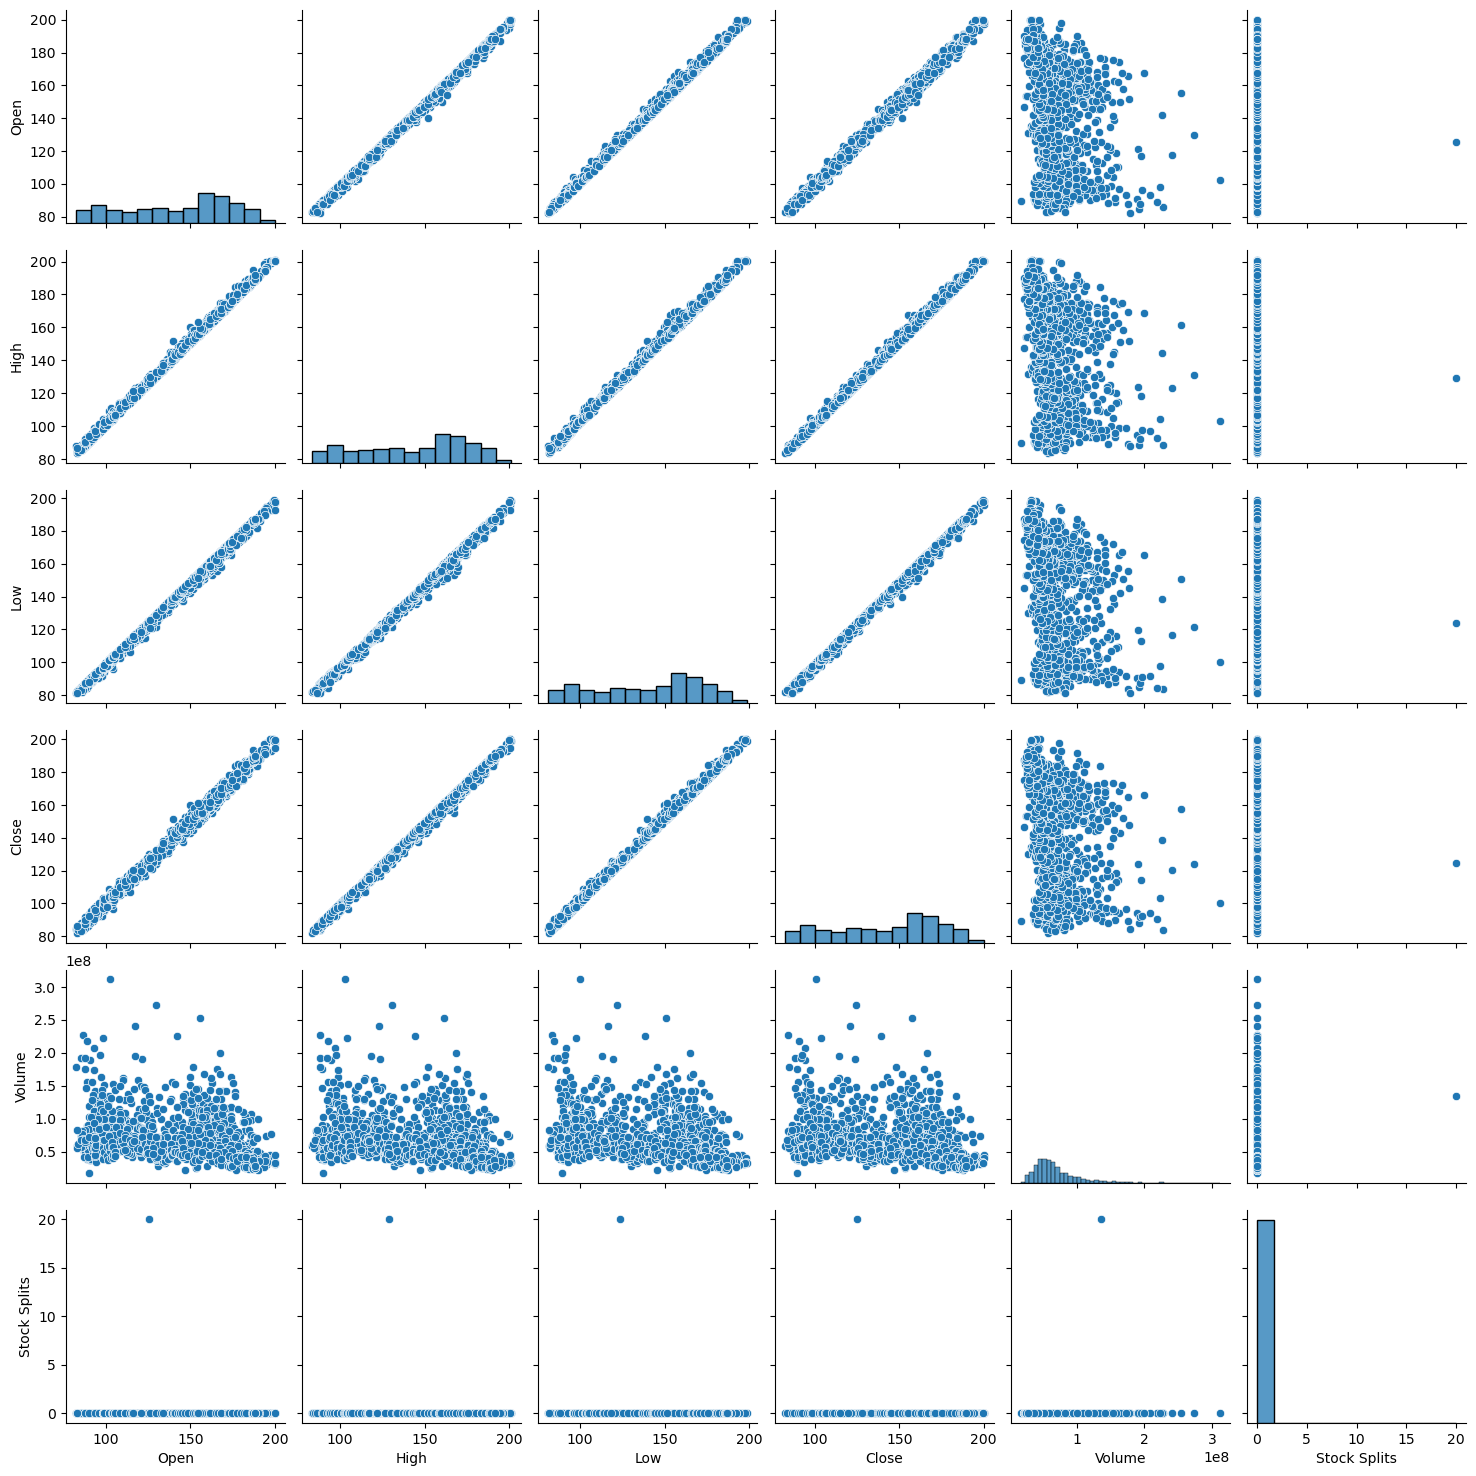

In [15]:
sns.pairplot(amzn_df, diag_kws={'common_norm': False})

plt.show()

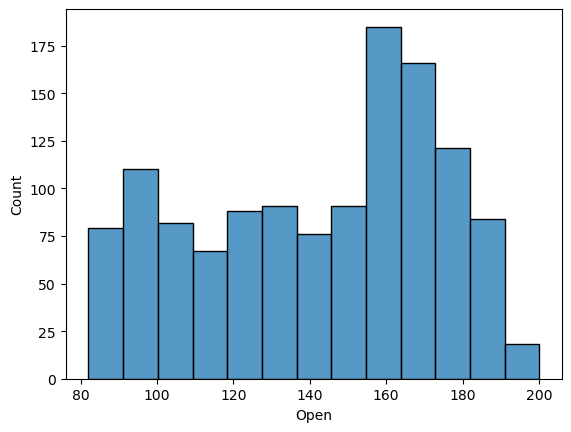

In [16]:
sns.histplot(amzn_df.Open )
plt.show()

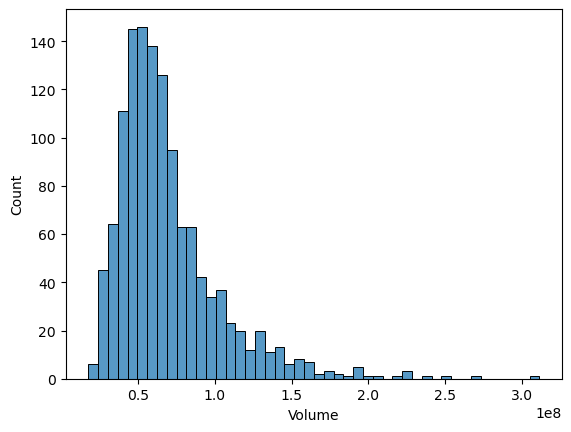

In [17]:
sns.histplot(amzn_df.Volume )
plt.show()

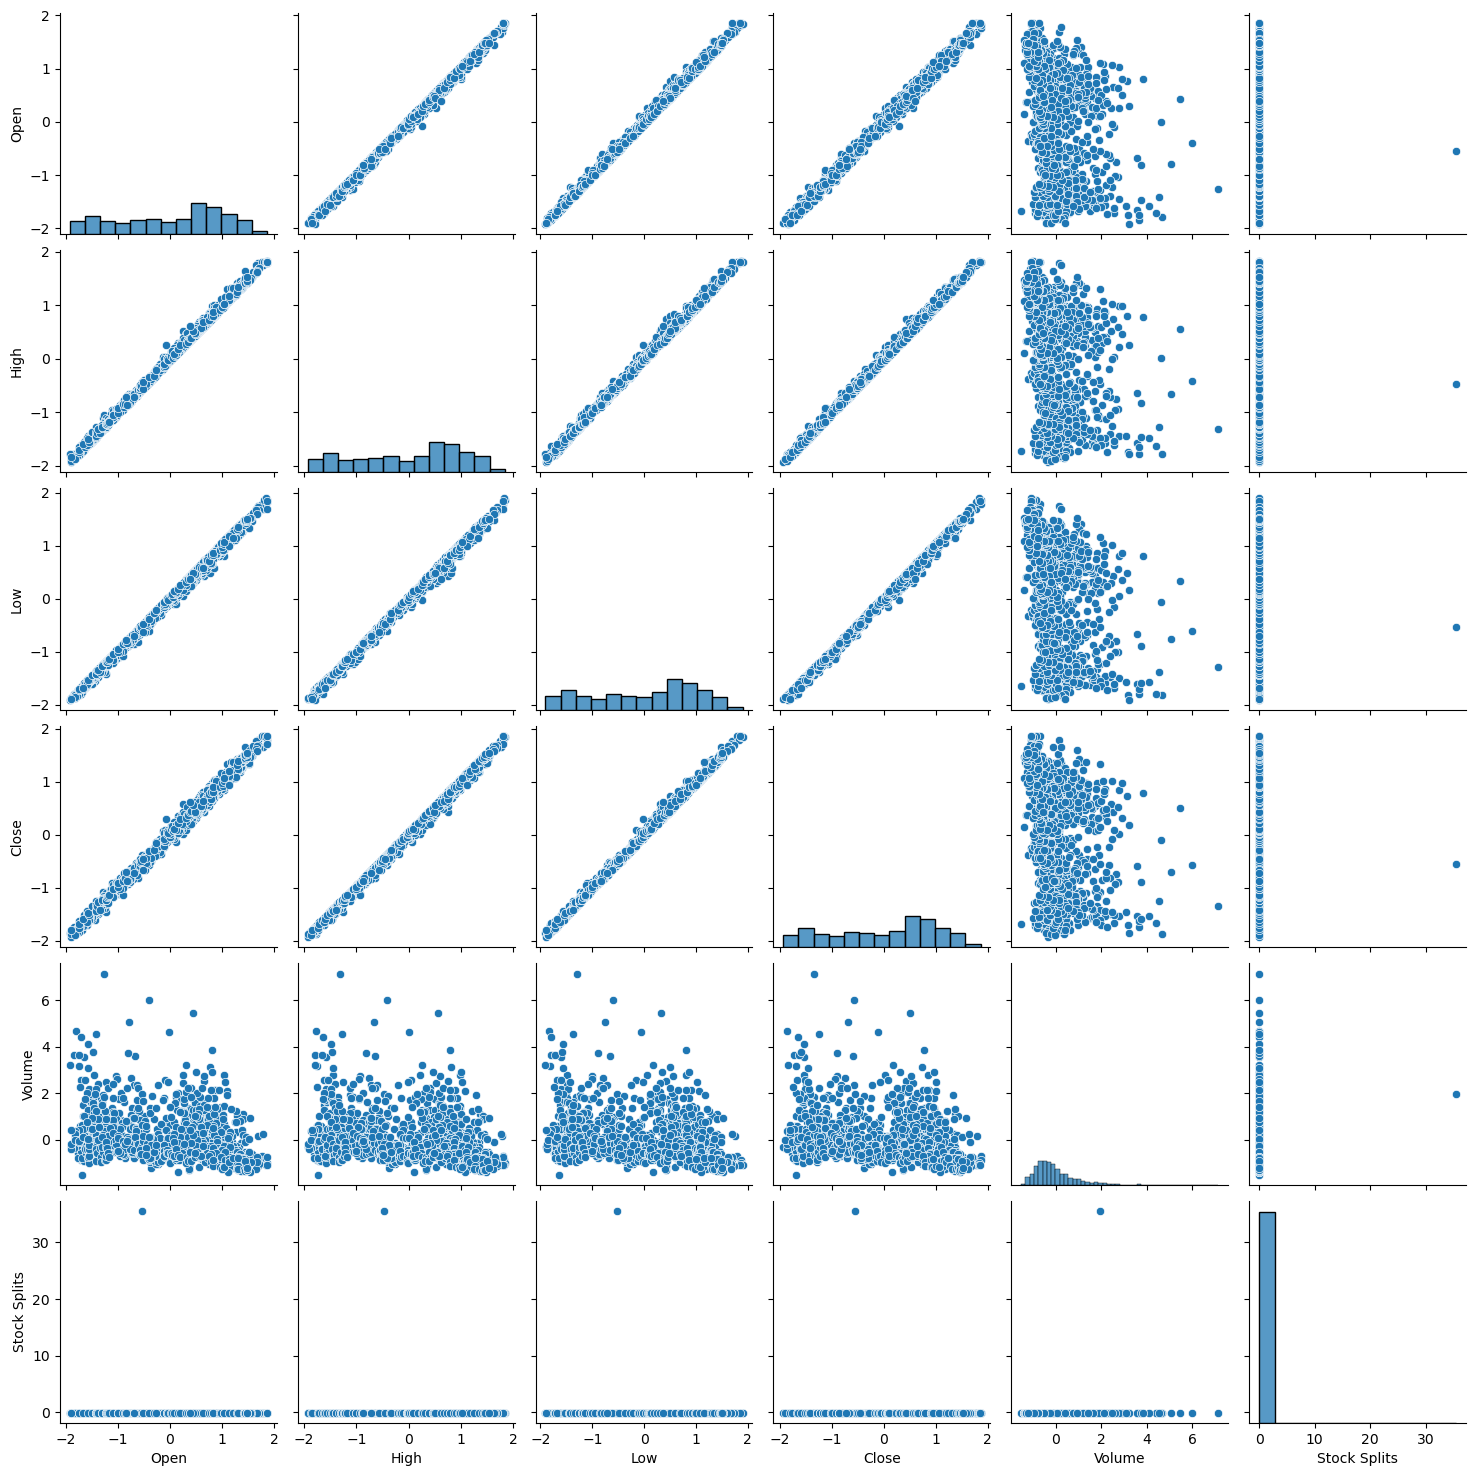

In [18]:
# Assuming amzn_df is your DataFrame with numerical columns for pairplot
# Select only numerical columns
numerical_columns = amzn_df.select_dtypes(include=['float64', 'int64']).columns

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(amzn_df[numerical_columns])

# Create a DataFrame for the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Plot pairplot on the standardized data
sns.pairplot(scaled_df)

# Show the plot
plt.show()

#### Start creating predictor variables

In [19]:
# Create the target variable: 1 if the price goes up the next day, 0 otherwise
amzn_df['price_direction'] = (amzn_df['Close'].shift(-1) > amzn_df['Close']).astype(int)

# Drop the last row, as it will have NaN in 'price_direction'
amzn_df = amzn_df.dropna()

# Check the new column
print(amzn_df[['Close', 'price_direction']].head())


       Close  price_direction
0  88.108498                1
1  89.039001                0
2  88.066498                1
3  88.853996                0
4  88.135498                1


In [20]:
# Daily return: percentage change in closing price
amzn_df['daily_return'] = amzn_df['Close'].pct_change()

In [21]:
# Short-term moving average (5-day)
amzn_df['ma_5'] = amzn_df['Close'].rolling(window=5).mean()

# Long-term moving average (20-day)
amzn_df['ma_20'] = amzn_df['Close'].rolling(window=20).mean()


In [22]:
def compute_rsi(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Compute 14-day RSI
amzn_df['rsi_14'] = compute_rsi(amzn_df['Close'], window=14)


In [23]:
# Volatility: rolling standard deviation of daily returns (20-day window)
amzn_df['volatility'] = amzn_df['daily_return'].rolling(window=20).std()

In [24]:
# 12-day and 26-day EMAs
amzn_df['ema_12'] = amzn_df['Close'].ewm(span=12, adjust=False).mean()
amzn_df['ema_26'] = amzn_df['Close'].ewm(span=26, adjust=False).mean()

In [25]:
# Bollinger Bands
amzn_df['bollinger_upper'] = amzn_df['ma_20'] + (2 * amzn_df['Close'].rolling(window=20).std())
amzn_df['bollinger_lower'] = amzn_df['ma_20'] - (2 * amzn_df['Close'].rolling(window=20).std())

In [26]:
# Moving average of volume over 10 days
amzn_df['volume_ma_10'] = amzn_df['Volume'].rolling(window=10).mean()

In [27]:
# Lagged close prices
amzn_df['lag_1'] = amzn_df['Close'].shift(1)
amzn_df['lag_2'] = amzn_df['Close'].shift(2)
amzn_df['lag_3'] = amzn_df['Close'].shift(3)

In [28]:
amzn_df

,Date,Open,High,Low,Close,Volume,Stock Splits,price_direction,daily_return,ma_5,...,rsi_14,volatility,ema_12,ema_26,bollinger_upper,bollinger_lower,volume_ma_10,lag_1,lag_2,lag_3
0,2019-10-23 00:00:00-04:00,88.065002,88.502502,87.099998,88.108498,42764000,0.0,1,NaN,NaN,...,NaN,NaN,88.108498,88.108498,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-24 00:00:00-04:00,88.554497,89.417000,88.013496,89.039001,88922000,0.0,0,0.010561,NaN,...,NaN,NaN,88.251652,88.177424,NaN,NaN,NaN,88.108498,NaN,NaN
2,2019-10-25 00:00:00-04:00,84.877502,88.210503,84.750000,88.066498,192528000,0.0,1,-0.010922,NaN,...,NaN,NaN,88.223167,88.169207,NaN,NaN,NaN,89.039001,88.108498,NaN
3,2019-10-28 00:00:00-04:00,87.403000,88.934998,87.125000,88.853996,74178000,0.0,0,0.008942,NaN,...,NaN,NaN,88.320217,88.219932,NaN,NaN,NaN,88.066498,89.039001,88.108498
4,2019-10-29 00:00:00-04:00,88.740501,88.849998,87.790497,88.135498,45538000,0.0,1,-0.008086,88.440698,...,NaN,NaN,88.291799,88.213678,NaN,NaN,NaN,88.853996,88.066498,89.039001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2024-10-16 00:00:00-04:00,187.050003,187.779999,185.610001,186.889999,23456800,0.0,1,-0.004262,187.517999,...,42.813862,0.013413,186.466529,185.365714,195.077492,180.116509,29796070.0,187.690002,187.539993,188.820007
1254,2024-10-17 00:00:00-04:00,188.220001,188.940002,186.000000,187.529999,25039400,0.0,1,0.003424,187.694000,...,49.189981,0.012741,186.630140,185.526031,194.883607,180.076395,29279580.0,186.889999,187.690002,187.539993
1255,2024-10-18 00:00:00-04:00,187.149994,190.740005,186.279999,188.990005,37417700,0.0,1,0.007785,187.728000,...,54.929582,0.012691,186.993196,185.782622,194.536164,180.162838,28932320.0,187.529999,186.889999,187.690002
1256,2024-10-21 00:00:00-04:00,188.050003,189.460007,186.399994,189.070007,24612200,0.0,1,0.000423,188.034003,...,57.617943,0.012351,187.312705,186.026132,193.670202,180.547800,27157120.0,188.990005,187.529999,186.889999


In [29]:
# Drop rows with missing values (caused by rolling calculations)
amzn_df = amzn_df.dropna()

# Check the data
print(amzn_df.head())

                        Date       Open       High        Low      Close  \
20 2019-11-20 00:00:00-05:00  87.457001  88.125999  86.706001  87.276497   
21 2019-11-21 00:00:00-05:00  87.150002  87.343498  86.517998  86.735497   
22 2019-11-22 00:00:00-05:00  86.950996  87.321503  86.550003  87.286003   
23 2019-11-25 00:00:00-05:00  87.662498  88.871002  87.662003  88.692001   
24 2019-11-26 00:00:00-05:00  88.996002  89.851501  88.917503  89.847000   

      Volume  Stock Splits  price_direction  daily_return       ma_5  ...  \
20  55800000           0.0                0     -0.004142  87.449402  ...   
21  53258000           0.0                1     -0.006199  87.250500  ...   
22  49582000           0.0                1      0.006347  87.312801  ...   
23  69724000           0.0                1      0.016108  87.525900  ...   
24  63624000           0.0                1      0.013023  87.967400  ...   

       rsi_14  volatility     ema_12     ema_26  bollinger_upper  \
20  37.97234

In [30]:
# Define features (explanatory variables) and target
X = amzn_df[['daily_return', 'ma_5', 'ma_20', 'rsi_14', 'volatility', 'ema_12', 'ema_26', 'bollinger_upper', 'bollinger_lower', 'volume_ma_10', 'lag_1', 'lag_2', 'lag_3']]
y = amzn_df['price_direction']

# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print(X_train.shape, X_test.shape)

(990, 13) (248, 13)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create the logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.5040


In [32]:
# Assuming amzn_df already has features and target defined
# Features (explanatory variables)
X = amzn_df[['daily_return', 'ma_5', 'ma_20', 'rsi_14', 'volatility', 'ema_12', 'ema_26', 
             'bollinger_upper', 'bollinger_lower', 'volume_ma_10', 'lag_1', 'lag_2', 'lag_3']]
# Target variable
y = amzn_df['price_direction']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), X.columns),  # Standardize features
        ('power', PowerTransformer(), X.columns)  # Apply Power Transformer to remove skewness
    ]
)

# Create a pipeline with the preprocessor and logistic regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.4839


In [33]:
# Assuming amzn_df already has features and target defined
# Features (explanatory variables)
X = amzn_df[['daily_return', 'ma_5', 'ma_20', 'rsi_14', 'volatility', 'ema_12', 'ema_26', 
             'bollinger_upper', 'bollinger_lower', 'volume_ma_10', 'lag_1', 'lag_2', 'lag_3']]
# Target variable
y = amzn_df['price_direction']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer for scaling and skew removal
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), X.columns),  # Standardize features
        ('power', PowerTransformer(), X.columns)  # Apply Power Transformer to remove skewness
    ]
)

# Add PCA to reduce dimensionality
pca = PCA(n_components=5)  # Keep top 5 principal components (you can adjust this)

# Create a pipeline with preprocessor, PCA, and logistic regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca),  # Apply PCA
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after PCA: {accuracy:.4f}")

# Optional: Check how much variance is explained by the PCA components
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PCA components: {explained_variance}")

Accuracy after PCA: 0.5000
Explained variance by PCA components: [0.70746005 0.10482395 0.08556059 0.0614792  0.03331911]


In [34]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display the classification report
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[28 90]
 [34 96]]

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.24      0.31       118
           1       0.52      0.74      0.61       130

    accuracy                           0.50       248
   macro avg       0.48      0.49      0.46       248
weighted avg       0.49      0.50      0.47       248



#### Playing with Time series 

/var/folders/yq/6h47_f4s3g16nl2gbhk2pvv80000gn/T/ipykernel_26776/3249517203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])


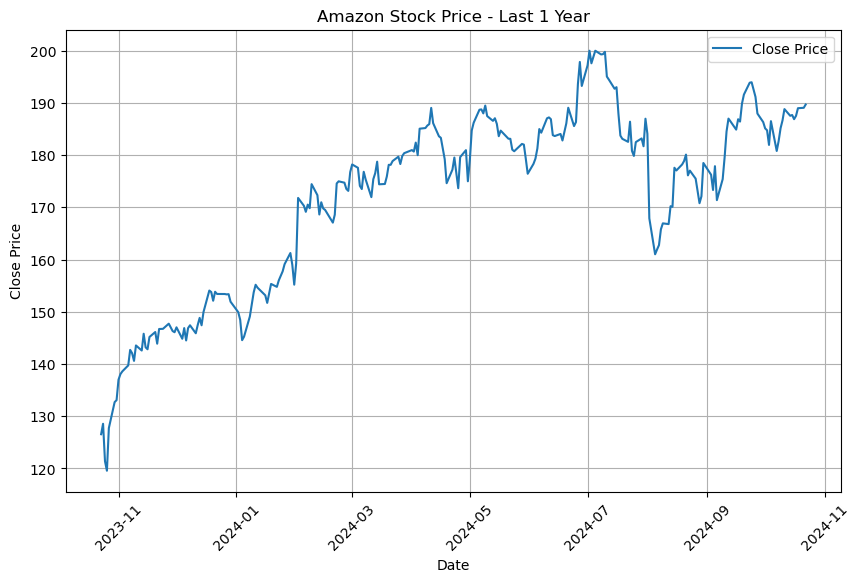

In [35]:
# Ensure the 'Date' column is of datetime type
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])

# Focus on the last 1 year of data
last_year_data = amzn_df.tail(252)

# Plot the stock prices with actual dates on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(last_year_data['Date'], last_year_data['Close'], label='Close Price')  # Use 'Date' for x-axis
plt.title('Amazon Stock Price - Last 1 Year')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [58]:
# Set 'Date' as the index for the DataFrame
last_year_data = last_year_data.set_index('Date')

In [67]:
# last_year_data

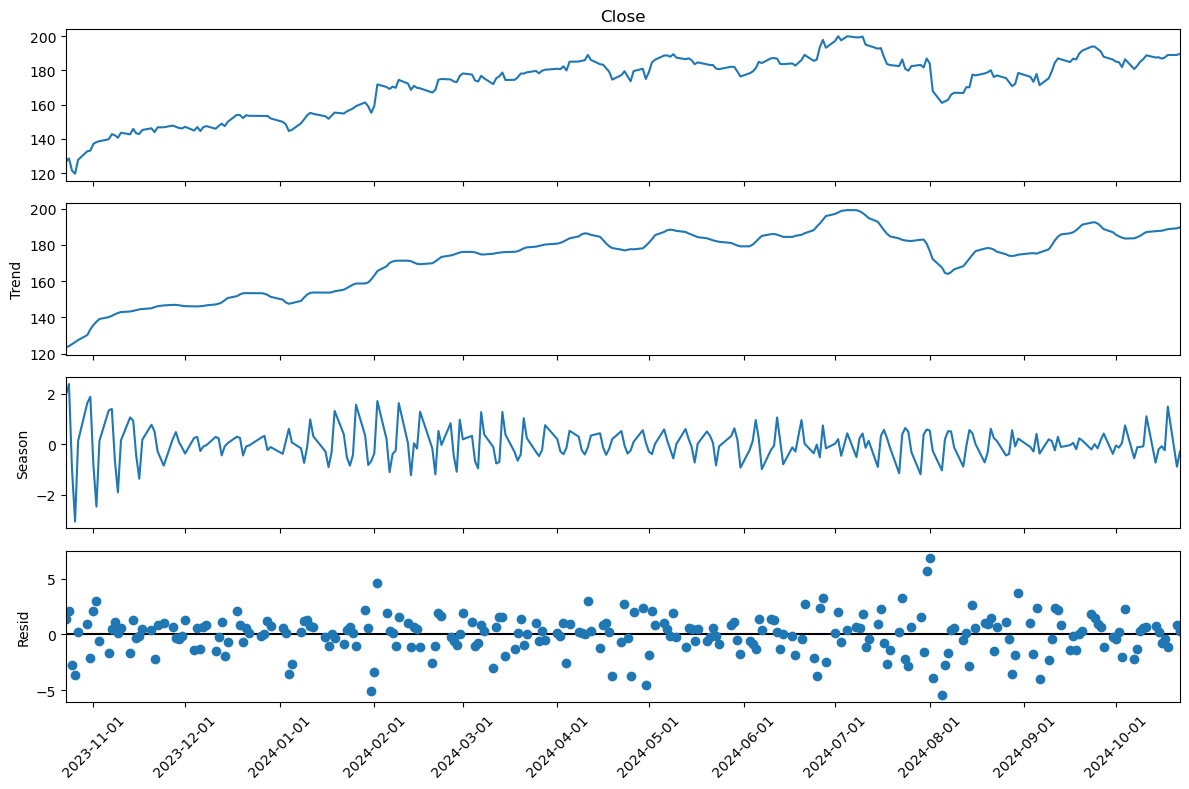

In [66]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Decompose the time series using STL (Seasonal and Trend decomposition)
stl = STL(last_year_data['Close'], period=5, seasonal=13)  # 5 trading days per week
result = stl.fit()

# Plot the decomposed components (Trend, Seasonal, Residual)
fig = result.plot()  # This returns the figure and axes objects

# Adjust the figure size (make it wider to stretch it out)
fig.set_size_inches(12, 8)

# Rotate the x-axis labels on all subplots
for ax in fig.axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format dates
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)  # Rotate labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

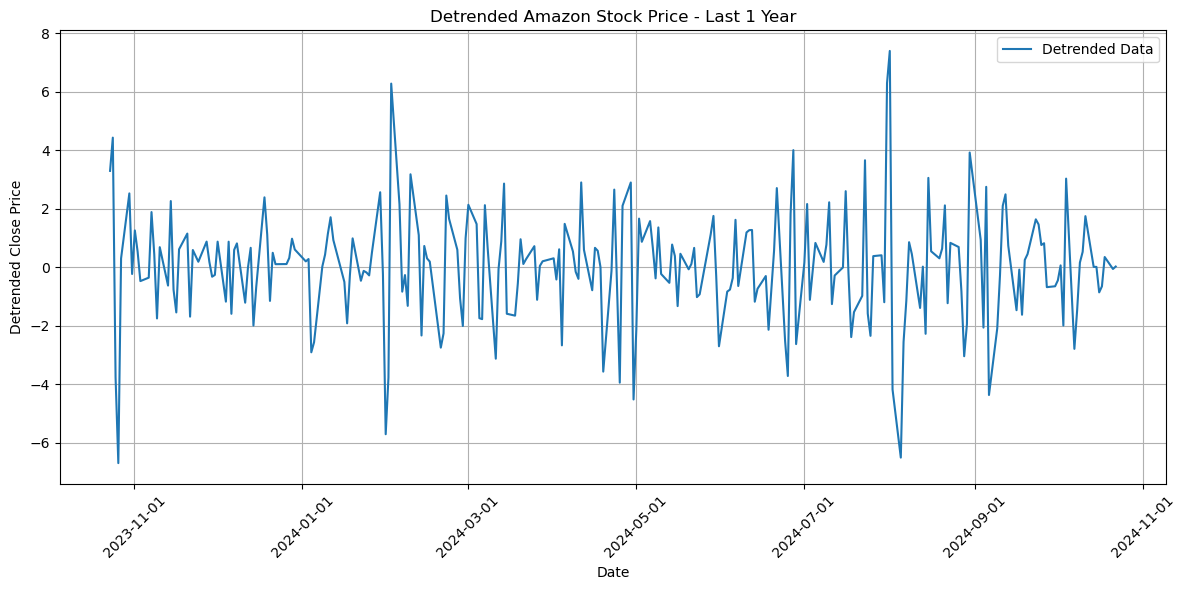

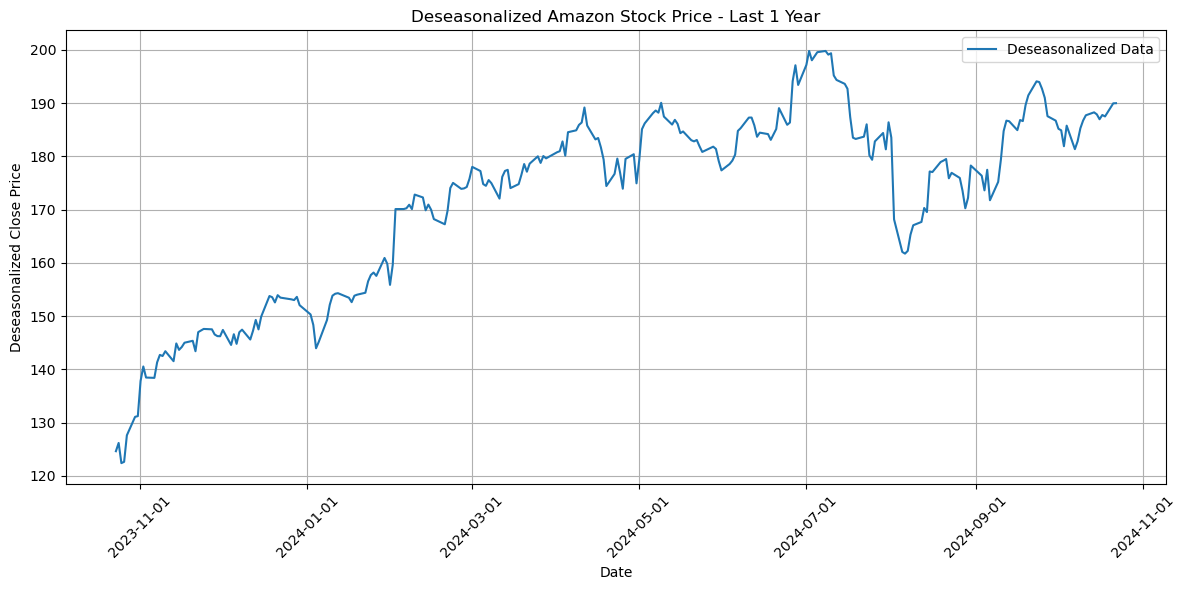

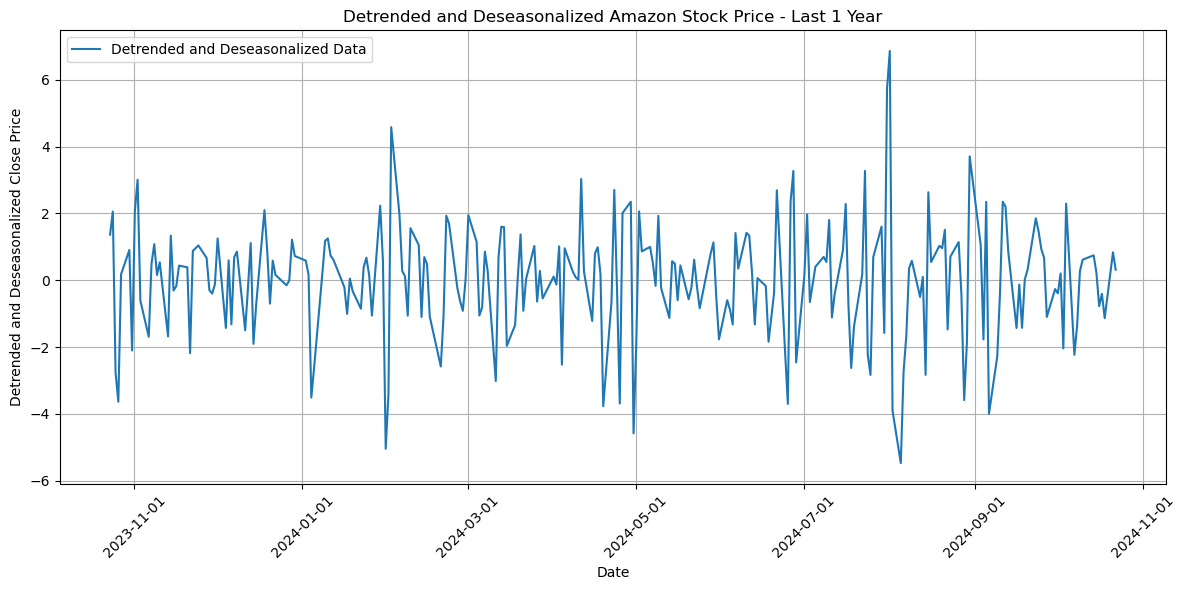

In [68]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Detrended data: Remove the trend component
detrended_data = last_year_data['Close'] - result.trend

plt.figure(figsize=(12, 6))  # Make the figure wider
plt.plot(last_year_data.index, detrended_data, label='Detrended Data')
plt.title('Detrended Amazon Stock Price - Last 1 Year')
plt.xlabel('Date')
plt.ylabel('Detrended Close Price')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format x-axis as dates
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto-adjust date ticks
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Deseasonalized data: Remove the seasonal component
deseasonalized_data = last_year_data['Close'] - result.seasonal

plt.figure(figsize=(12, 6))  # Make the figure wider
plt.plot(last_year_data.index, deseasonalized_data, label='Deseasonalized Data')
plt.title('Deseasonalized Amazon Stock Price - Last 1 Year')
plt.xlabel('Date')
plt.ylabel('Deseasonalized Close Price')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format x-axis as dates
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto-adjust date ticks
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Detrended and Deseasonalized data: Remove both trend and seasonal components
detrended_seasonalized_data = detrended_data - result.seasonal

plt.figure(figsize=(12, 6))  # Make the figure wider
plt.plot(last_year_data.index, detrended_seasonalized_data, label='Detrended and Deseasonalized Data')
plt.title('Detrended and Deseasonalized Amazon Stock Price - Last 1 Year')
plt.xlabel('Date')
plt.ylabel('Detrended and Deseasonalized Close Price')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format x-axis as dates
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto-adjust date ticks
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

<Figure size 1000x600 with 0 Axes>

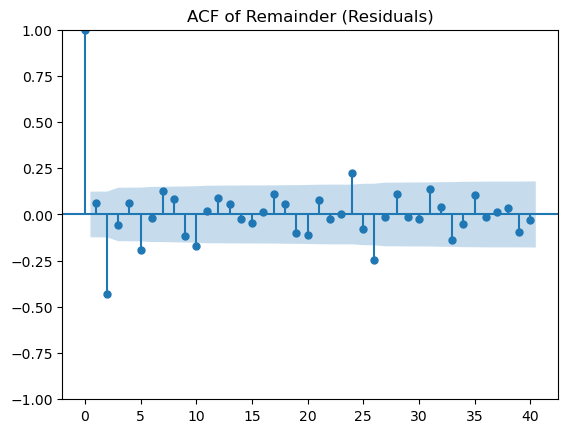

In [50]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF of the remainder (residual component)
plt.figure(figsize=(10, 6))
plot_acf(result.resid.dropna(), lags=40)
plt.title('ACF of Remainder (Residuals)')
plt.show()

<Figure size 1000x600 with 0 Axes>

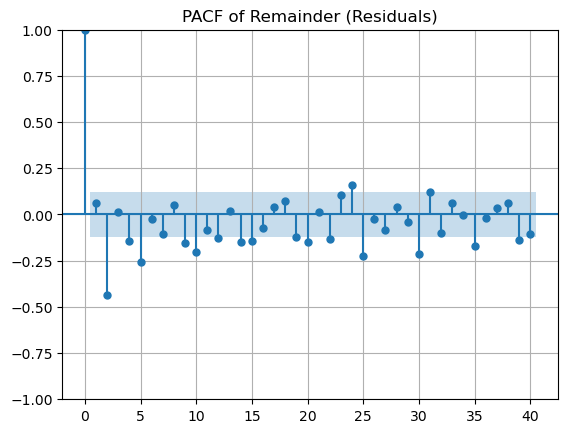

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the PACF of the residuals
plt.figure(figsize=(10, 6))
plot_pacf(result.resid.dropna(), lags=40)  # Adjust lags as necessary
plt.title('PACF of Remainder (Residuals)')
plt.grid(True)
plt.show()

In [42]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Apply the Box-Ljung test on the residuals of the STL decomposition
# 'lags' defines how many lags you want to test for autocorrelation
ljung_box_results = acorr_ljungbox(result.resid.dropna(), lags=[10], return_df=True)  # Test up to lag 10

# Print the results of the test
print("Ljung-Box Test Results:")
print(ljung_box_results)

Ljung-Box Test Results:
      lb_stat     lb_pvalue
10  76.651015  2.268140e-12


Residuals are autocorrelated.

### Fitting ARIMA

In [57]:
# Assuming your data has a 'Close' column with the closing stock prices and 'price_direction'
# Focus on the last 5 years of data (252 trading days per year)
last_5_years_data = amzn_df.tail(252 * 5)

# Fit an ARIMA model (adjust p, d, q based on ACF/PACF or trial-and-error)
arima_order = (5, 1, 3)  # ARIMA (p=5, d=1, q=3) as an example
model_arima = ARIMA(last_5_years_data['Close'], order=arima_order)
model_arima_fit = model_arima.fit()

# Print a summary of the ARIMA model
print(model_arima_fit.summary())

# Forecasting the last part of the data
# Here, forecast the next day's price based on the training data
y_pred_arima = model_arima_fit.predict(start=0, end=len(last_5_years_data)-1, dynamic=False)

# Convert the continuous ARIMA forecast into a binary classification
# If forecasted close price is greater than the previous day's close price, mark it as 1 (up), otherwise 0 (not up)
y_pred_direction = (y_pred_arima.shift(-1) > last_5_years_data['Close']).astype(int)[:-1]  # Drop the last row due to NaN

# Compare to the actual price_direction for accuracy
y_actual_direction = last_5_years_data['price_direction'].iloc[:-1]  # Drop last row to match length of predictions

# Calculate accuracy
accuracy_arima = accuracy_score(y_actual_direction, y_pred_direction)
print(f'ARIMA Model Accuracy (Last 5 Years): {accuracy_arima:.4f}')

/Applications/anaconda3/envs/equity_vs_commodity/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Applications/anaconda3/envs/equity_vs_commodity/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Applications/anaconda3/envs/equity_vs_commodity/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Applications/anaconda3/envs/equity_vs_comm

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1238
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -3132.741
Date:                Tue, 22 Oct 2024   AIC                           6283.482
Time:                        17:26:39   BIC                           6329.566
Sample:                             0   HQIC                          6300.816
                               - 1238                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1650      0.097     -1.706      0.088      -0.354       0.025
ar.L2          0.1283      0.108      1.187      0.235      -0.084       0.340
ar.L3          0.9099      0.103      8.838      0.0

### RNN and LSTM

In [45]:
import tensorflow as tf
print(tf.__version__)  # This should print the version of TensorFlow you have installed

2.17.0


In [52]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN
from sklearn.metrics import mean_squared_error

### LSTM Model

In [53]:
# Assume amzn_df is your full dataframe with 'Close' and 'price_direction' columns

# Use the last 5 years of data (252 trading days per year)
last_5_years_data = amzn_df.tail(252 * 5)

# Extract features and target
X = last_5_years_data[['Close']]  # Using 'Close' price as the predictor
y = last_5_years_data['price_direction']  # The target is 'price_direction'

# Normalize the Close price data for better performance
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Train-test split (80% training, 20% testing on the last 5 years)
split_idx = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Reshape X_train and X_test for LSTM (LSTM expects 3D input: samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [51]:
# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the LSTM model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32)

# Make predictions
y_pred_lstm = model_lstm.predict(X_test)

# Convert probabilities to binary (0 or 1)
y_pred_lstm_binary = (y_pred_lstm > 0.5).astype(int)

# Inverse scaling is not needed for binary classification
# Calculate accuracy
accuracy_lstm = accuracy_score(y_test, y_pred_lstm_binary)
print(f'LSTM Model Accuracy (Last 5 Years): {accuracy_lstm:.4f}')

Epoch 1/20


/Applications/anaconda3/envs/equity_vs_commodity/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4813 - loss: 0.6935
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5108 - loss: 0.6930 
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5287 - loss: 0.6924 
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.5188 - loss: 0.6926
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.5040 - loss: 0.6933
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.5329 - loss: 0.6917
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.5229 - loss: 0.6918
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.5099 - loss: 0.6925
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.5078 - loss: 0.6922
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.4965 - loss: 0.6932
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.5319 - loss: 0.6906
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.

### RNN Model

In [54]:
# Build the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_rnn.add(SimpleRNN(units=50))
model_rnn.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the RNN model
model_rnn.fit(X_train, y_train, epochs=20, batch_size=32)

# Make predictions
y_pred_rnn = model_rnn.predict(X_test)

# Convert probabilities to binary (0 or 1)
y_pred_rnn_binary = (y_pred_rnn > 0.5).astype(int)

# Calculate accuracy
accuracy_rnn = accuracy_score(y_test, y_pred_rnn_binary)
print(f'RNN Model Accuracy (Last 5 Years): {accuracy_rnn:.4f}')


Epoch 1/20


/Applications/anaconda3/envs/equity_vs_commodity/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - accuracy: 0.5135 - loss: 0.6941 
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.5231 - loss: 0.6924
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.5407 - loss: 0.6905
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.5293 - loss: 0.6900
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.5183 - loss: 0.6913
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.5091 - loss: 0.6932
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.5135 - loss: 0.6920
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.5061 - loss: 0.6938
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.5224 - loss: 0.6926
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.5201 - loss: 0.6937
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5470 - loss: 0.6913  
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accurac

In [55]:
print(f'ARIMA Model Accuracy: {accuracy_arima:.4f}')
print(f'LSTM Model Accuracy: {accuracy_lstm:.4f}')
print(f'RNN Model Accuracy: {accuracy_rnn:.4f}')

ARIMA Model Accuracy: -4411086252523.8984
LSTM Model Accuracy: 0.5040
RNN Model Accuracy: 0.5081
